By Christoph Guettner

Task: Create three 2Dim Datasets, and use K_means method for self-learned classification. Make Scree Plots to find the optimal number of center and visualise the results.

In [137]:
import pandas as pd
import numpy as np

from sklearn.datasets import make_blobs, make_s_curve
from sklearn.cluster import KMeans

from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set() 



### Data Preparation

In [182]:
centers = [(22,28), (68, 64), (75, 23)]

n_samples=1000
X_3, y_3 = make_blobs(n_samples=n_samples, centers=centers, n_features=2, random_state=0, cluster_std=10)
X_s, y = make_s_curve(n_samples=n_samples, noise=0.3, random_state=42)
X_s=np.delete(X_s,np.s_[1:2],1)

sin1= np.linspace(0, 21, n_samples)
sin2 = np.piecewise(sin1,[sin1<= 7, (sin1 > 7) & (sin1 < 14), 14 < sin1], [lambda x: np.sin(x).ravel()+ np.sin(2 * x).ravel(),lambda x: np.sin(x).ravel()-2+ np.sin(1.5*x).ravel(), lambda x: np.cos(x).ravel()+2+ np.cos(1.5 * x).ravel()])
X_sin=np.vstack((sin1,sin2)).T

Data = {'feature_C1': X_3[:,0], 'feature_C2': X_3[:,1], 'feature_S1': X_s[:,0], 'feature_S2': X_s[:,1],'feature_sin1': X_sin[:,0], 'feature_sin2': X_sin[:,1]}
        
df= pd.DataFrame(Data)
df.head(3)

,feature_C1,feature_C2,feature_S1,feature_S2,feature_sin1,feature_sin2
0,11.514470,13.799821,-1.188924,0.725337,0.000000,0.000000
1,39.640523,32.001572,-1.142107,-0.694515,0.021021,0.063049
2,70.042045,35.165777,0.748429,-2.129549,0.042042,0.126015


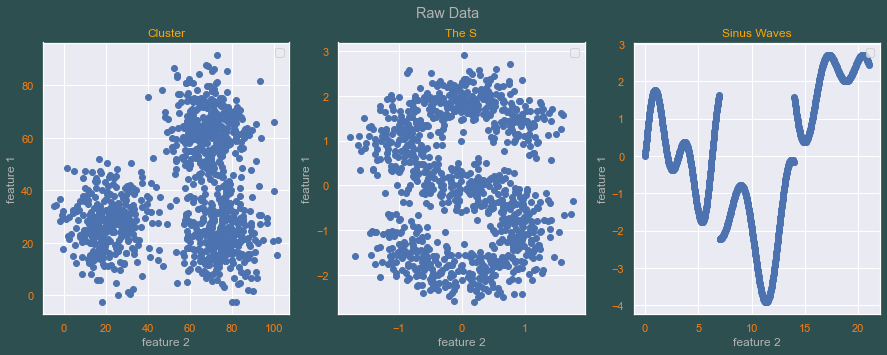

In [170]:
Form=['Cluster', 'The S', 'Sinus Waves']

fig = plt.figure(figsize=(15,5),facecolor=(.18, .31, .31))
fig.suptitle('Raw Data', color ='0.7')
k=1
for i in range(len(df.columns)):
    if i%2 == 0:
        ax = fig.add_subplot(1,3,k)
        ax.set_title(Form[k-1], color='orange')
        ax.scatter(df.iloc[:,i],df.iloc[:,(i+1)])
        ax.set_xlabel('feature 2', color='0.7')
        ax.set_ylabel('feature 1', color='0.7')
        plt.legend([])
        ax.tick_params(labelcolor='tab:orange')
        k+=1


### Create Scree Plots

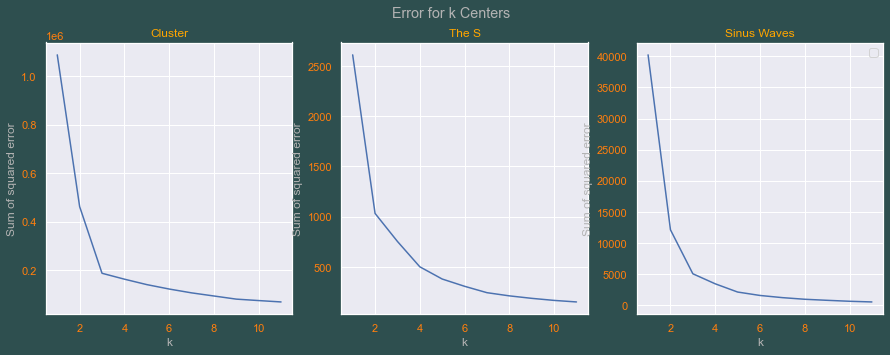

In [184]:
sse=[]
k_rng = range(1,12)
for k in k_rng:
    km = KMeans(n_clusters=k)
    for i in range(len(df.columns)):
        if i%2 == 0:
            km.fit(df.iloc[:, np.r_[i,(i+1)]])
            sse.append(km.inertia_)

Nth = int(len(df.columns)/2)
sse_sorted = [sse[i::Nth] for i in range(Nth)]


fig, axes = plt.subplots(1,3, figsize=(15,5), facecolor=(.18, .31, .31))
fig.suptitle('Error for k Centers', color ='0.7')
k=0
for i,ax in enumerate(axes.flatten()):
    ax.plot(k_rng,sse_sorted[i])
    ax.set_title(Form[k], color='orange')
    ax.set_xlabel('k', color='0.7')
    ax.set_ylabel('Sum of squared error', color='0.7')
    plt.legend([])
    ax.tick_params(labelcolor='tab:orange')
    k+=1


### Fit the Model and Predict

In [172]:
n_clusters=[3,4,3]
Data = [X_3,X_s,X_sin]
Learning_Results, Center_Learned=[],[]

for i in range(len(Data)):
    km = KMeans(n_clusters=n_clusters[i])
    y_learned = km.fit_predict(Data[i])
    center_learned = km.cluster_centers_
    Learning_Results.append(y_learned)
    Center_Learned.append(center_learned)


#Learing_Results_Array = np.array(Learing_Results)

############################################################
df.insert(2,'LR_3',Learning_Results[0], True)
df.insert(5,'LR_S',Learning_Results[1],True)
df['LR_sin']=Learning_Results[2]

df.head(5)

,feature_C1,feature_C2,LR_3,feature_S1,feature_S2,LR_S,feature_sin1,feature_sin2,LR_sin
0,11.514470,13.799821,1,-1.188924,0.725337,1,0.000000,0.000000,2
1,39.640523,32.001572,1,-1.142107,-0.694515,3,0.021021,0.063049,2
2,70.042045,35.165777,2,0.748429,-2.129549,3,0.042042,0.126015,2
3,89.167910,47.891216,0,0.911731,-0.411717,0,0.063063,0.188813,2
4,67.691264,6.582968,2,0.374262,2.187132,2,0.084084,0.251362,2


### Visualise Results

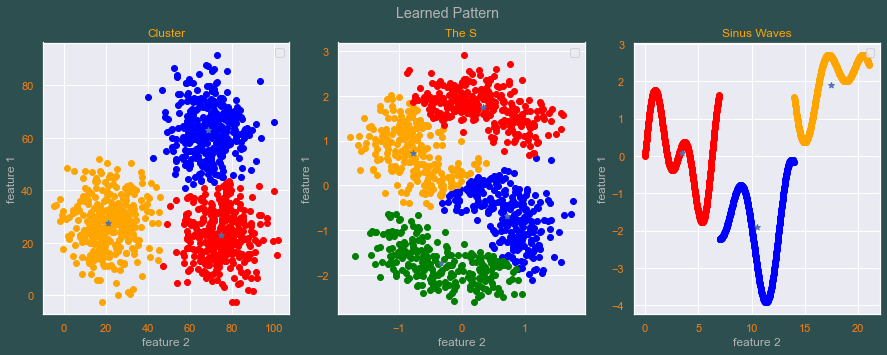

In [180]:
fig = plt.figure(figsize=(15,5),facecolor=(.18, .31, .31))
fig.suptitle('Learned Pattern', color ='0.7')
k=1
for i in range(len(df.columns)):
    if i%3 == 0:
        ax = fig.add_subplot(1,3,k)
        ax.set_title(Form[k-1], color='orange')
        ax.scatter(df.iloc[(df.iloc[:,(i+2)]==0).values,i],df.iloc[(df.iloc[:,(i+2)]==0).values,(i+1)], color='blue')
        ax.scatter(df.iloc[(df.iloc[:,(i+2)]==1).values,i],df.iloc[(df.iloc[:,(i+2)]==1).values,(i+1)], color='orange')
        ax.scatter(df.iloc[(df.iloc[:,(i+2)]==2).values,i],df.iloc[(df.iloc[:,(i+2)]==2).values,(i+1)], color='red')
        ax.scatter(df.iloc[(df.iloc[:,(i+2)]==3).values,i],df.iloc[(df.iloc[:,(i+2)]==3).values,(i+1)], color='green')
        ax.scatter(Center_Learned[k-1][:,0],Center_Learned[k-1][:,1], marker='*')
        ax.set_xlabel('feature 2', color='0.7')
        ax.set_ylabel('feature 1', color='0.7')
        plt.legend([])
        ax.tick_params(labelcolor='tab:orange')
        k+=1



